# **1).Problem Statement**
# 
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# **3).Loading Packages and Data**

In [183]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,adjusted_rand_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder



In [184]:
df =pd.read_csv('/kaggle/input/train-data/Train.csv')
df_test =pd.read_csv('/kaggle/input/test-data/Test.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


feutures

In [185]:
df.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

will have to drop it so many categorical values

# **Univariate Analysis**

<Axes: >

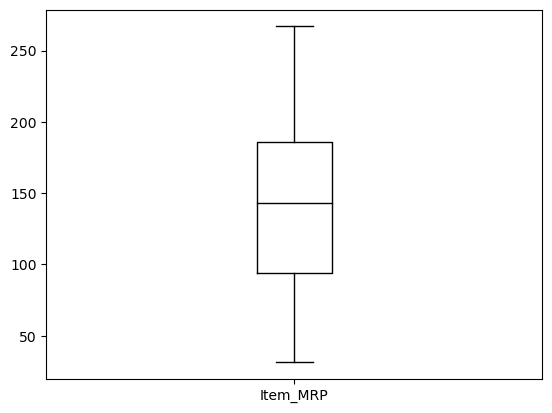

In [186]:
df.boxplot(column=['Item_MRP'], grid=False, color='black')

<Axes: >

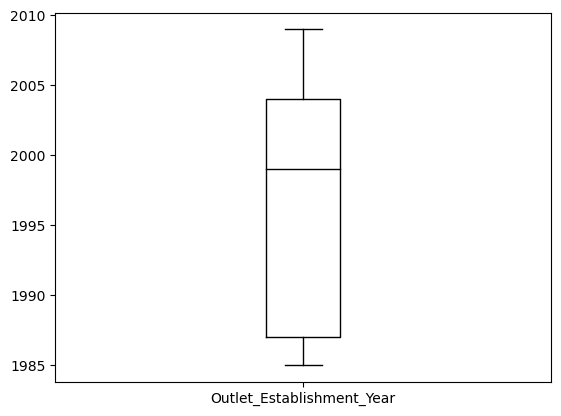

In [187]:
df.boxplot(column=['Outlet_Establishment_Year'], grid=False, color='black')

<Axes: >

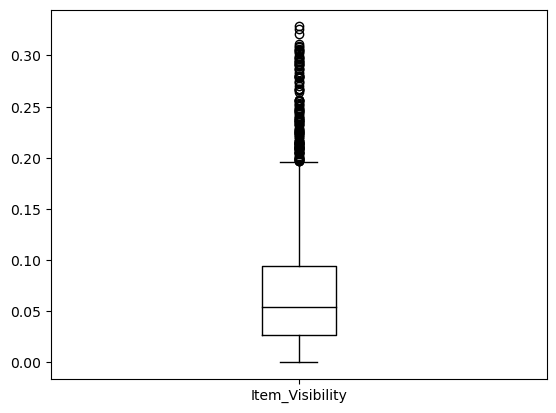

In [188]:
df.boxplot(column=['Item_Visibility'], grid=False, color='black')

ohhh so many outliers here

<Axes: >

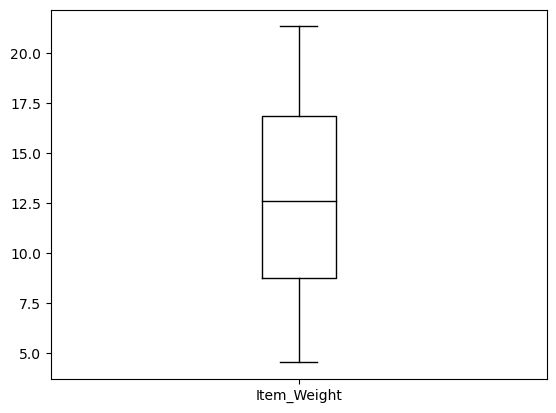

In [189]:
df.boxplot(column=['Item_Weight'], grid=False, color='black')

lets remove ouliers using IQR

In [190]:
# Calculate Q1, Q3, and IQR
q1 = np.percentile(df.Item_Visibility, 25)
q3 = np.percentile(df.Item_Visibility, 75)
iqr = q3 - q1

# Define the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers
outliers = df.Item_Visibility[((df.Item_Visibility) < lower_bound) | ((df.Item_Visibility) > upper_bound)]

# Remove the outliers from the dataset
df.Item_Visibility = (df.Item_Visibility)[((df.Item_Visibility) >= lower_bound) & ((df.Item_Visibility) <= upper_bound)]

<Axes: >

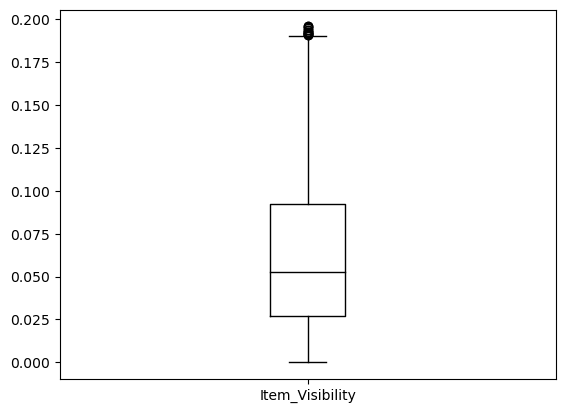

In [191]:
df.boxplot(column=['Item_Visibility'], grid=False, color='black')

wow that is actually a lot better

array([[<Axes: title={'center': 'Item_Weight'}>]], dtype=object)

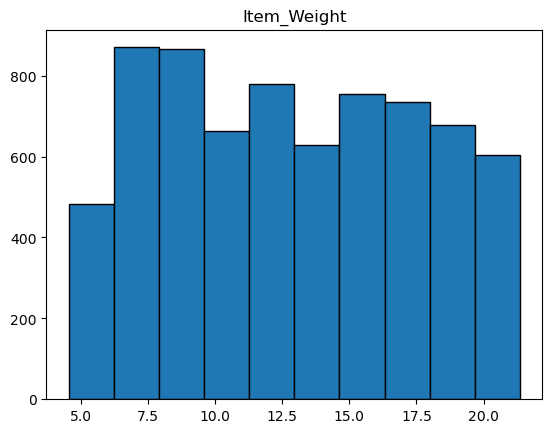

In [192]:
df.hist(column='Item_Weight', grid=False, edgecolor='black')

array([[<Axes: title={'center': 'Item_Visibility'}>]], dtype=object)

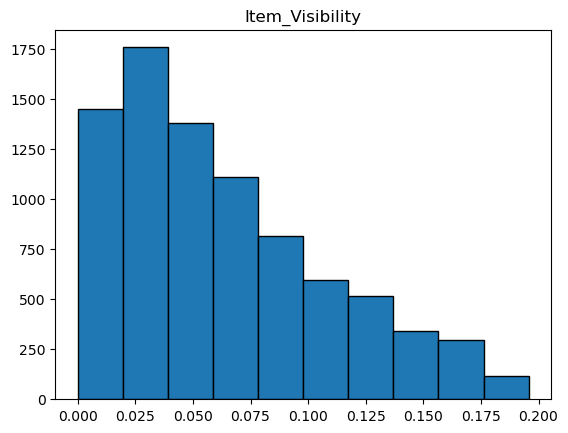

In [193]:
df.hist(column='Item_Visibility', grid=False, edgecolor='black')

array([[<Axes: title={'center': 'Item_MRP'}>]], dtype=object)

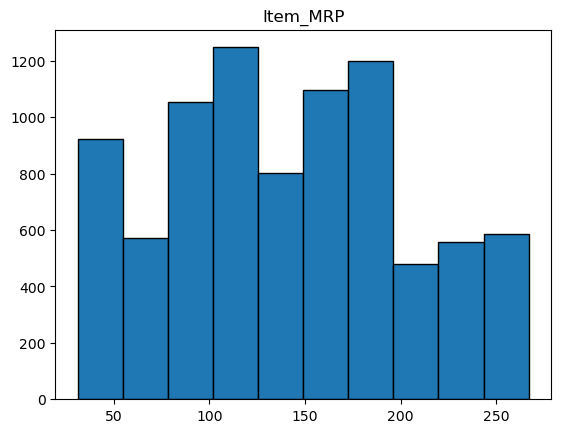

In [194]:
df.hist(column='Item_MRP', grid=False, edgecolor='black')

# **Bivariate Analysis**

lets try it using scatter plots

Text(0, 0.5, 'Item_Outlet_Sales')

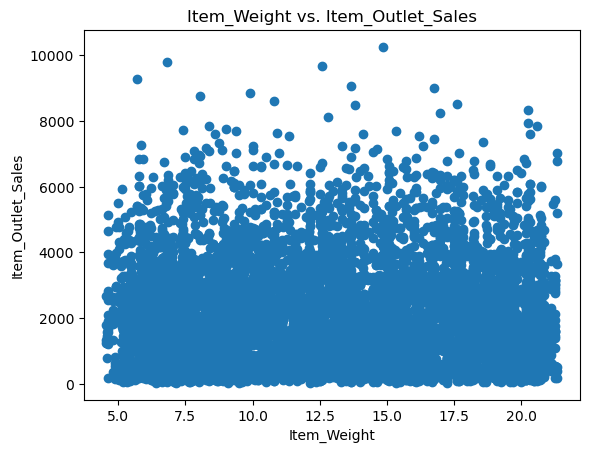

In [195]:
plt.scatter(df.Item_Weight, df.Item_Outlet_Sales)
plt.title('Item_Weight vs. Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')

okay I want to do that with all the feutures

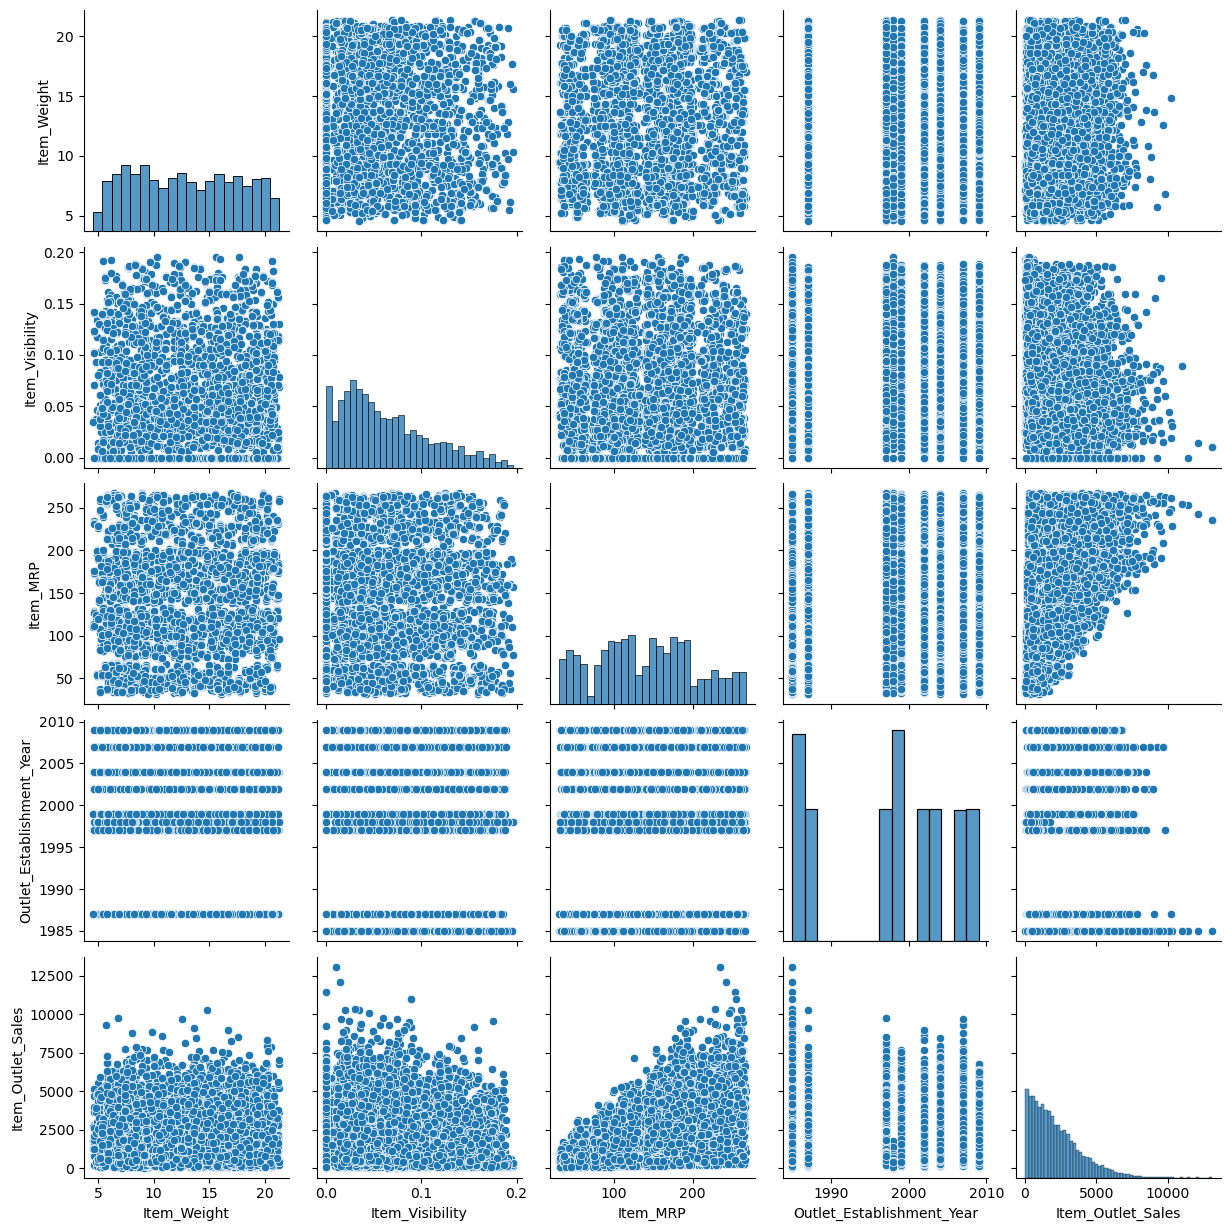

In [196]:
sns.pairplot(df)


In [197]:
df = df.drop(["Item_Identifier"], axis = 1)
df_test = df_test.drop(["Item_Identifier"], axis = 1)


In [198]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [199]:
#feutures we will keep are supermarkettype outletsize outletidentifier outlettype itemtype itemfat itemmrp outletlocation
#feutures = ['Item_MRP',
#'Outlet_Type',
#'Outlet_Size',
#'Outlet_Location_Type',
#'Item_Type',
#'Outlet_Identifier',
#'Item_Fat_Content',
#'Item_Outlet_Sales'
#]
#df= df[feutures]
#feutures2 = ['Item_MRP',
#'Outlet_Type',
#'Outlet_Size',
#'Outlet_Location_Type',
#'Item_Type',
#'Outlet_Identifier',
#'Item_Fat_Content'
#]
#df_test= df_test[feutures2]


okay since feutures are all different units lets normalize it

In [200]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [201]:
#data_encoded=pd.get_dummies(data=Categorical_df,drop_first=True)
#data_encoded
label_encoder = LabelEncoder()

# apply the label encoder to all categorical columns
df_ready = df.apply(lambda col: label_encoder.fit_transform(col.astype(str)) if col.dtype == 'object' else col)
df_ready

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [202]:
y = df_ready.Item_Outlet_Sales
X = df_ready.drop(columns=["Item_Outlet_Sales"],axis=1)

In [203]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.282525,0.25,0.081991,0.266667,0.927507,1.000000,0.583333,0.333333,0.0,0.333333
1,0.081274,0.50,0.098498,0.933333,0.072068,0.333333,1.000000,0.333333,1.0,0.666667
2,0.770765,0.25,0.085632,0.666667,0.468288,1.000000,0.583333,0.333333,0.0,0.333333
3,0.871986,0.50,0.000000,0.400000,0.640093,0.000000,0.541667,1.000000,1.0,0.000000
4,0.260494,0.25,0.000000,0.600000,0.095805,0.111111,0.083333,0.000000,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.25,0.290124,0.866667,0.777729,0.111111,0.083333,0.000000,1.0,0.333333
8519,0.227746,0.50,0.240048,0.000000,0.326263,0.777778,0.708333,1.000000,0.5,0.333333
8520,0.359929,0.25,0.179778,0.533333,0.228492,0.666667,0.791667,0.666667,0.5,0.333333
8521,0.158083,0.50,0.741977,0.866667,0.304939,0.333333,1.000000,0.333333,1.0,0.666667


In [204]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [205]:
val_X.isnull().sum()

Item_Weight                  372
Item_Fat_Content               0
Item_Visibility               42
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

using imputation to deal with missing values numeric

In [206]:
val_X.dtypes

Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
dtype: object

In [207]:
train_X.dtypes

Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
dtype: object

In [208]:
val_X = val_X.fillna(val_X.mean())

In [209]:
train_X = train_X.fillna(train_X.mean()) 

In [210]:
val_X.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [211]:
train_X.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [212]:
train_X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6130,0.151533,0.25,0.563224,0.400000,0.596006,0.777778,0.708333,1.000000,0.5,0.333333
4961,0.479012,0.50,0.379819,0.266667,0.951813,0.222222,0.916667,1.000000,0.5,0.333333
1095,0.206311,0.25,0.569277,0.866667,0.522541,0.666667,0.791667,0.666667,0.5,0.333333
5082,0.663590,0.25,0.625339,0.200000,0.432533,0.111111,0.083333,0.000000,1.0,0.333333
1377,0.431378,0.25,0.043733,0.533333,0.364855,0.666667,0.791667,0.666667,0.5,0.333333


# **linear regression**

In [213]:
model1=LinearRegression()
model1.fit(train_X,train_y)

LinearRegression()

In [214]:
predictions = model1.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error: 919.6854526118132


ohh wow so highh

# **random forest model**

In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model2 = RandomForestRegressor(random_state=1)
model2.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [216]:
predictions = model2.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error: 796.1243449901456


In [217]:
#df_readyy = pd.concat([num_dff,data_encodedd], axis = 1)
#df_readyy
#data_encoded=pd.get_dummies(data=Categorical_df,drop_first=True)
#data_encoded
label_encoder = LabelEncoder()

# apply the label encoder to all categorical columns
df_readyy = df_test.apply(lambda col: label_encoder.fit_transform(col.astype(str)) if col.dtype == 'object' else col)
df_readyy

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,8.300,4,0.038428,4,87.3198,2,2007,3,1,1
2,14.600,1,0.099575,11,241.7538,0,1998,3,2,0
3,7.315,1,0.015388,13,155.0340,2,2007,3,1,1
4,NaN,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,13,141.3154,8,1997,2,0,1
5677,7.600,2,0.142991,15,169.1448,3,2009,1,2,2
5678,10.000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,15.300,2,0.000000,3,214.6218,2,2007,3,1,1


In [218]:
scaler = MinMaxScaler()
df_readyy = pd.DataFrame(scaler.fit_transform(df_readyy), columns=df_readyy.columns)
df_readyy

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.964275,0.25,0.023374,0.866667,0.323413,1.000000,0.583333,0.333333,0.0,0.333333
1,0.222983,1.00,0.118737,0.266667,0.235849,0.222222,0.916667,1.000000,0.5,0.333333
2,0.598095,0.25,0.307674,0.733333,0.894140,0.000000,0.541667,1.000000,1.0,0.000000
3,0.164335,0.25,0.047548,0.866667,0.524488,0.222222,0.916667,1.000000,0.5,0.333333
4,NaN,0.50,0.366458,0.266667,0.862069,0.555556,0.000000,0.333333,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...
5676,0.353974,0.50,0.041702,0.866667,0.466011,0.888889,0.500000,0.666667,0.0,0.333333
5677,0.181304,0.50,0.441825,1.000000,0.584637,0.333333,1.000000,0.333333,1.0,0.666667
5678,0.324204,0.25,0.227194,0.533333,0.369798,0.777778,0.708333,1.000000,0.5,0.333333
5679,0.639774,0.50,0.000000,0.200000,0.778487,0.222222,0.916667,1.000000,0.5,0.333333


In [219]:
df_readyy=df_readyy.fillna(df_readyy.mean())

In [221]:
predictions = model2.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error: 796.1243449901456


In [224]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model2, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.7392 ± 0.0705,Item_MRP
0.5402 ± 0.0167,Outlet_Type
0.0108 ± 0.0074,Outlet_Establishment_Year
0.0043 ± 0.0058,Outlet_Identifier
-0.0001 ± 0.0024,Outlet_Size
-0.0011 ± 0.0022,Outlet_Location_Type
-0.0038 ± 0.0011,Item_Fat_Content
-0.0063 ± 0.0060,Item_Weight
-0.0095 ± 0.0049,Item_Visibility
-0.0106 ± 0.0073,Item_Type


lets drop the feutures that dont matter
feutures we will keep are supermarkettype outletsize outletidentifier outlettype itemtype itemfat itemmrp outletlocation

okay i will go up and drop the unneeded feutures and compare before dropping mer using random forest: 796
and XG boost 766

okay they goy higher no dropping

In [246]:
#feutures we will keep are supermarkettype outletsize outletidentifier outlettype itemtype itemfat itemmrp outletlocation
feutures_2 = ['Item_MRP',
'Outlet_Type',
'Outlet_Establishment_Year',
'Outlet_Identifier',
'Outlet_Size',
'Outlet_Location_Type'
]
train_X2= train_X[feutures_2]
train_X2

,Item_MRP,Outlet_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Size,Outlet_Location_Type
6130,0.596006,0.333333,0.708333,0.777778,1.000000,0.5
4961,0.951813,0.333333,0.916667,0.222222,1.000000,0.5
1095,0.522541,0.333333,0.791667,0.666667,0.666667,0.5
5082,0.432533,0.333333,0.083333,0.111111,0.000000,1.0
1377,0.364855,0.333333,0.791667,0.666667,0.666667,0.5
...,...,...,...,...,...,...
2895,0.531008,0.000000,0.000000,0.444444,0.666667,0.0
7813,0.100619,0.000000,0.000000,0.444444,0.666667,0.0
905,0.500067,0.333333,0.500000,0.888889,0.666667,0.0
5192,0.054833,0.000000,0.541667,0.000000,1.000000,1.0


In [248]:
val_X2 = val_X[feutures_2]


In [249]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X2, train_y)
melb_preds = forest_model.predict(val_X2)
print(mean_absolute_error(val_y, melb_preds))

848.9734486203391


oh it is worse actually

# **lets try XG boost**

In [244]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)], 
             verbose=False)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=4, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [245]:
predictions = my_model.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error: 758.4023684018161


wow so much better